# THU VIEN

In [ ]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
import itertools # construct specialized tools
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# LOAD DATA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/python cho máy học /data/dataset.csv")
data = pd.DataFrame(data)
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# EDA

In [ ]:
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [ ]:
data.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance                          2
Previous qualification                             17
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International               

In [ ]:
for feature in data.columns:
  print(feature, " : ", data[feature].unique())

Marital status  :  [1 2 4 3 5 6]
Application mode  :  [ 8  6  1 12  9 17 15 16 14  4 13  7  3  2  5 18 10 11]
Application order  :  [5 1 2 4 3 6 9 0]
Course  :  [ 2 11  5 15  3 17 12 10 14 16  6  8 13  9  4  1  7]
Daytime/evening attendance  :  [1 0]
Previous qualification  :  [ 1 12 16 14  8  3 15  2  4  9 17 11  6  7 13  5 10]
Nacionality  :  [ 1 15  3 14 12 18  5 11  8 17  4  9 13 16 10 21  2 20 19  6  7]
Mother's qualification  :  [13  1 22 23  3  4 27  2 19 10 25  7  5 24  9 26 18 11 20 21  6  8 17 28
 12 14 16 15 29]
Father's qualification  :  [10  3 27 28  1 14  5  4 24  2 29  9  7 26 18 30 12 15 25 31 16 11 20 33
 13 32  8  6 21 17 34 23 19 22]
Mother's occupation  :  [ 6  4 10  8  5  2 16  1  7  3 12  9 20 28 13 29 23 32 30 18 24 19 11 21
 15 27 31 14 22 17 26 25]
Father's occupation  :  [10  4  8 11  6  9  5  2  3 22  7  1 12 39 19 13 29 46 43 34 44 30 41 24
 23 45 35 26 28 36 16 37 31 42 20 15 40 25 21 17 32 38 27 18 14 33]
Displaced  :  [1 0]
Educational special needs  :  [

In [ ]:
print("The number of value lack in column:")
print(data.isnull().sum())

The number of value lack in column:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International               

FEATURE

In [ ]:
Categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
            'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
            'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs',
            'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
Numeric_features = list(set(data.columns)-set(Categorical_features)-set(['Target']))

print(len(Categorical_features))
print(Categorical_features)
print(len(Numeric_features))
print(Numeric_features)

17
['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International']
17
['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Age at enrollment', 'Inflation rate', 'Curricular units 1st sem (without evaluations)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Application order', 'Curricular units 1st sem (evaluations)', 'GDP', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)']


PHẦN TRĂM TARGET

Text(0.5, 1.0, 'Target')

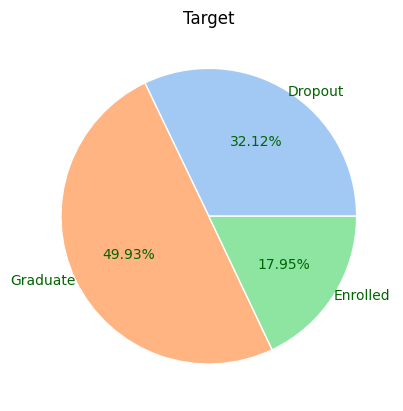

In [ ]:
import seaborn as sns
num=[]
for t in data['Target'].unique():
  num.append(data['Target'].tolist().count(t))
plt.pie(num, labels=data['Target'].unique(), autopct="%.2f%%", labeldistance=1.,
        wedgeprops = {'linewidth':1, 'edgecolor':'white'}, textprops={'color':'darkgreen', 'fontsize':10},
        colors=sns.color_palette('pastel'))
plt.title('Target')

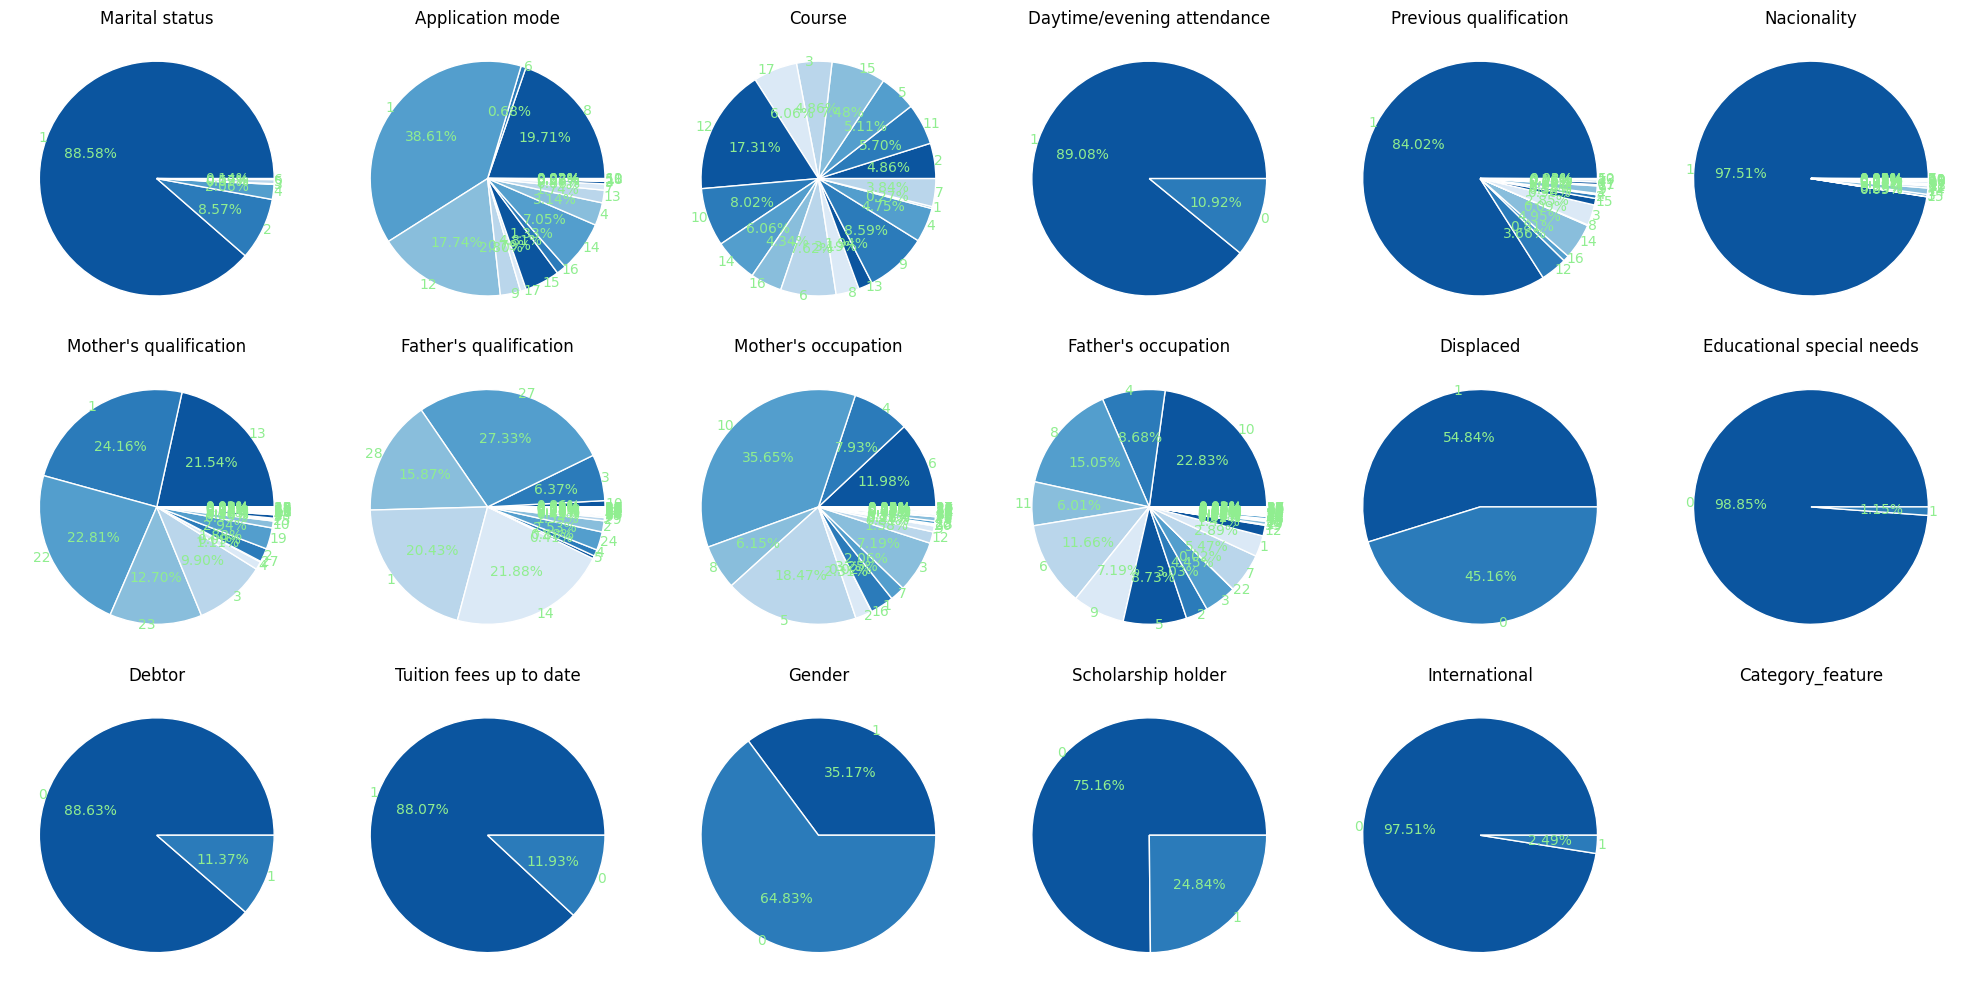

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
plt.title("Category_feature")
for k in range(len(Categorical_features)):
  num = []
  for t in data[Categorical_features[k]].unique():
    num.append(data[Categorical_features[k]].tolist().count(t))
  axes[k//6][k%6].pie(num, labels=data[Categorical_features[k]].unique(), autopct="%.2f%%", labeldistance=1.,
            wedgeprops = {'linewidth':1, 'edgecolor':'white'}, textprops={'color':'lightgreen', 'fontsize':10},
            colors=sns.color_palette('Blues_r'))
  axes[k//6][k%6].set_title(Categorical_features[k])
axes[-1][-1].axis('off')
plt.tight_layout()
plt.show()

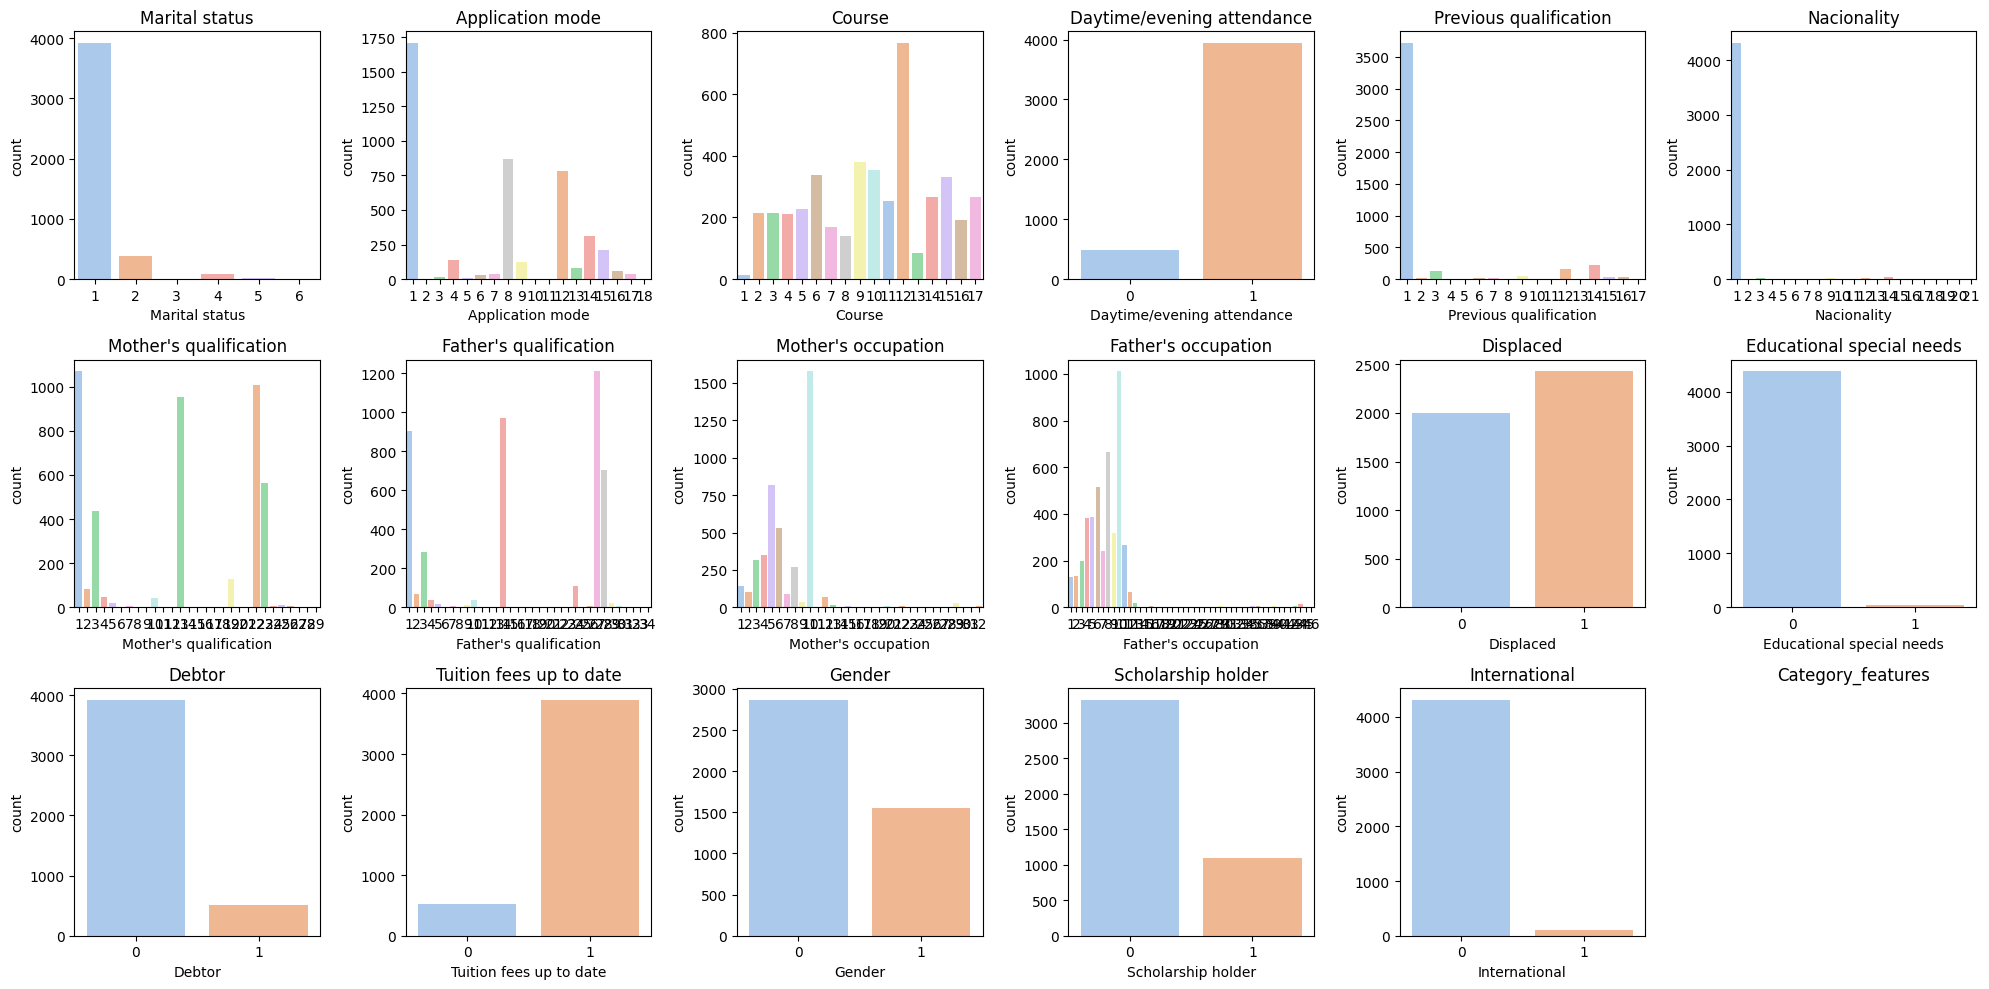

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
plt.title("Category_features")
for k in range(len(Categorical_features)):
  sns.countplot(ax=axes[k//6][k%6], data=data, x=Categorical_features[k], palette=sns.color_palette('pastel'))
  axes[k//6][k%6].set_title(Categorical_features[k])

axes[-1][-1].axis('off')
plt.tight_layout()
plt.show()

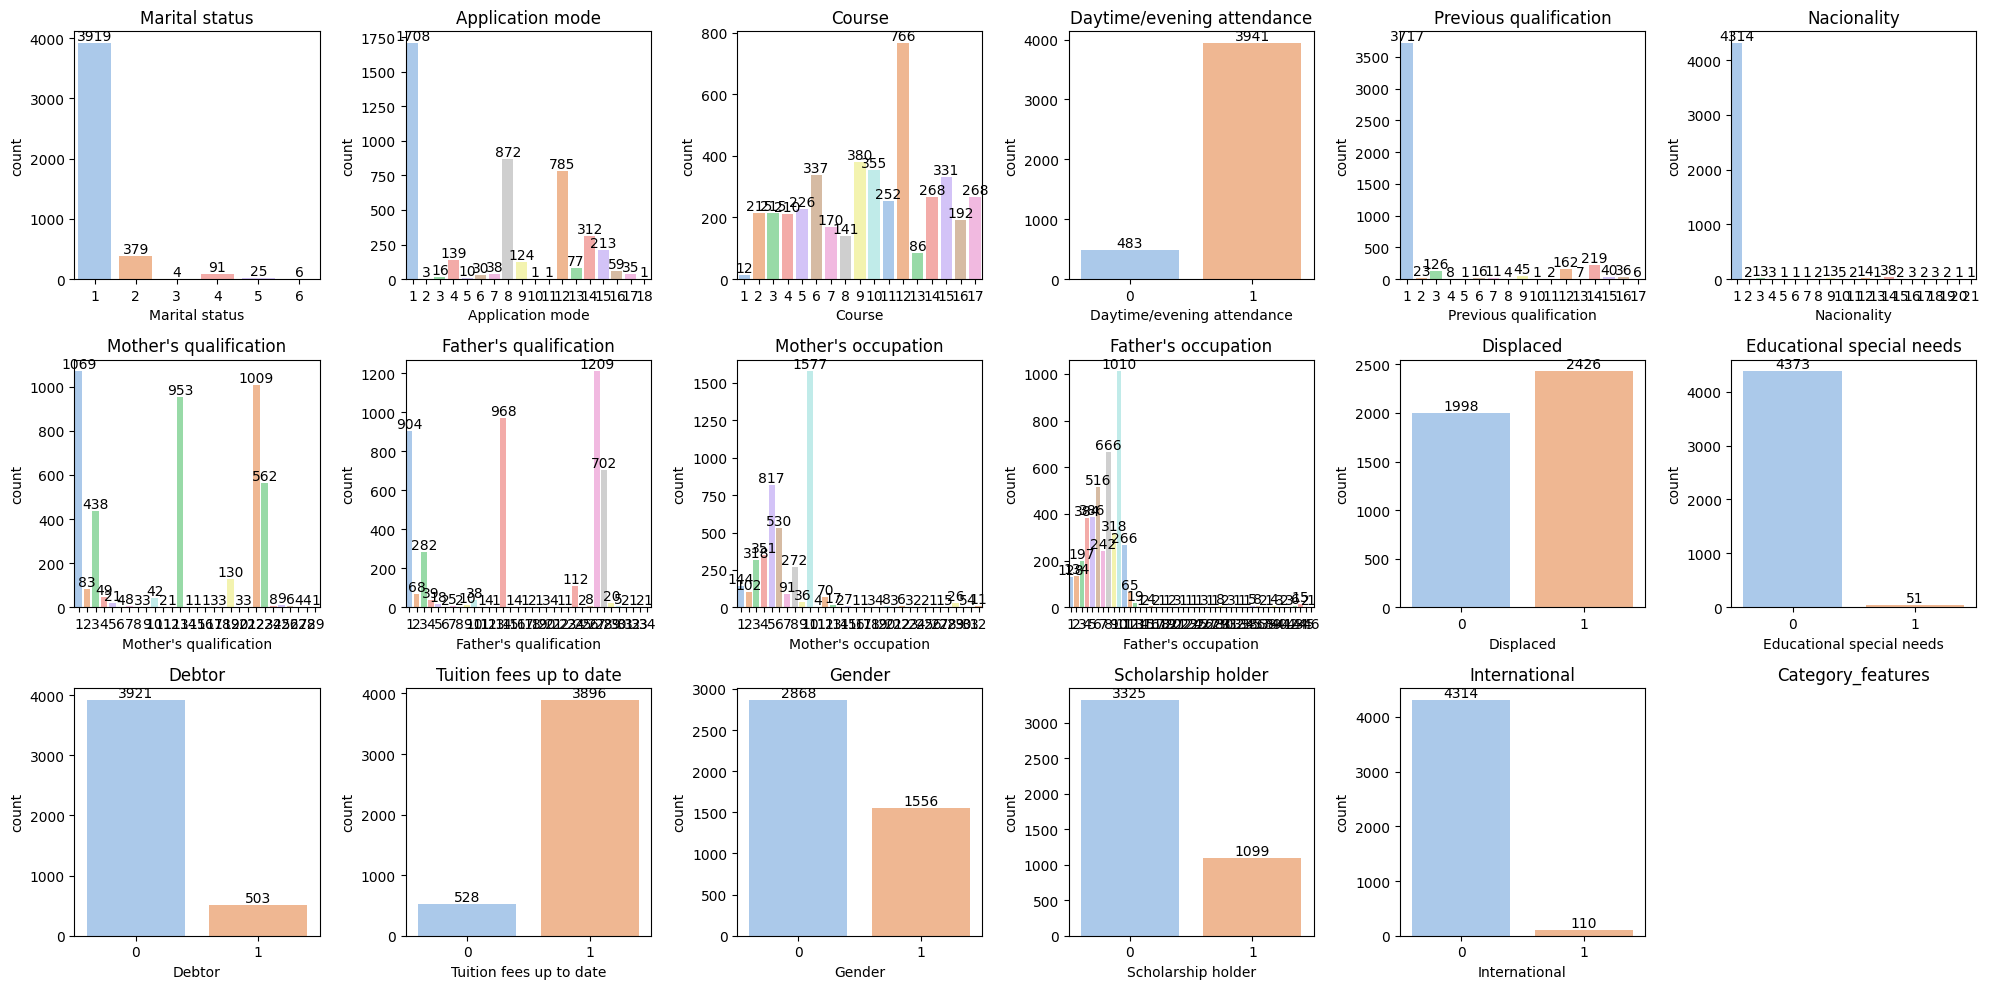

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
plt.title("Category_features")
for k in range(len(Categorical_features)):
    ax = sns.countplot(ax=axes[k//6][k%6], data=data, x=Categorical_features[k], palette=sns.color_palette('pastel'))
    axes[k//6][k%6].set_title(Categorical_features[k])
    for label in ax.containers:
        ax.bar_label(label)
axes[-1][-1].axis('off')
plt.tight_layout()
plt.show()

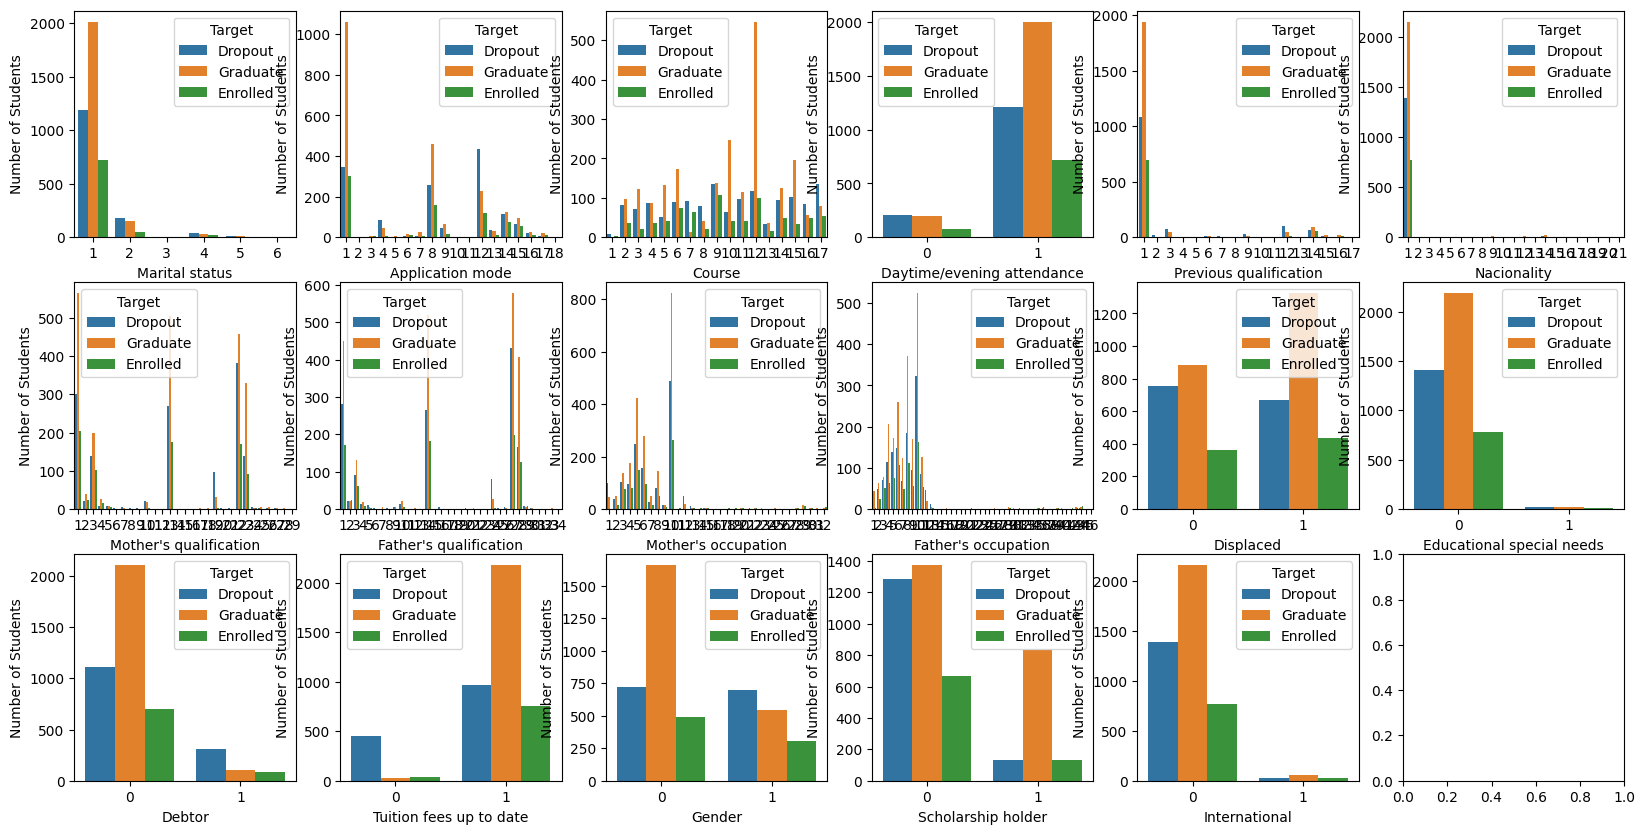

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
for k in range(len(Categorical_features)):
    sns.countplot(ax=axes[k//6][k%6], data=data, x=Categorical_features[k], hue='Target')
    axes[k//6][k%6].set_ylabel('Number of Students')
plt.tight_layout
plt.show()

Numeric_features

In [ ]:
for feature in Numeric_features:
    print(feature, ";", data[feature].unique())

Curricular units 1st sem (credited) ; [ 0  2  3  6  7 13  4  1  5 19 11  8 10  9 15 12 14 18 17 16 20]
Curricular units 2nd sem (grade) ; [ 0.         13.66666667 12.4        13.         11.5        14.345
 14.14285714 13.5        14.2        13.21428571 11.         12.
 14.545      12.25       11.425      12.85714286 12.28571429 14.11428571
 13.28571429 12.33333333 13.71666667 10.57142857 13.4        14.375
 13.42857143 10.         11.6        15.8        14.34285714 13.8
 14.33333333 13.2        13.77142857 12.83333333 14.16666667 11.83333333
 13.595      12.9        14.935      12.22142857 12.42857143 10.75
 10.8        13.75       10.85714286 13.33333333 15.05555556 11.66666667
 12.2        13.3        11.33333333 13.08       11.2        13.25
 14.47777778 14.23076923 12.27272727 12.3        15.         12.8
 12.57142857 12.51666667 10.66666667 11.4        14.         11.25
 13.77777778 15.01111111 13.74285714 14.6        11.71428571 12.5
 14.83333333 12.89285714 17.5875     12.666

In [ ]:
for feature in Numeric_features:
    print(data[feature].value_counts())

0     3847
2       94
1       85
3       69
6       51
4       47
7       41
5       41
8       31
9       27
11      17
10      15
14      15
13      13
12      12
15       5
18       4
17       3
16       3
19       2
20       2
Name: Curricular units 1st sem (credited), dtype: int64
0.000000     870
12.000000    170
11.000000    165
13.000000    150
11.500000     86
            ... 
14.622222      1
13.994444      1
11.685714      1
15.657143      1
11.083333      1
Name: Curricular units 2nd sem (grade), Length: 786, dtype: int64
7.6     571
9.4     533
10.8    525
12.4    445
12.7    419
11.1    414
15.5    397
13.9    390
8.9     368
16.2    362
Name: Unemployment rate, dtype: int64
18    1036
19     911
20     599
21     322
22     174
24     131
23     108
26      94
25      93
27      91
28      83
29      66
32      61
34      60
31      55
35      49
30      49
33      45
37      42
39      38
36      35
41      31
38      29
43      25
40      23
45      22
44      21
47   

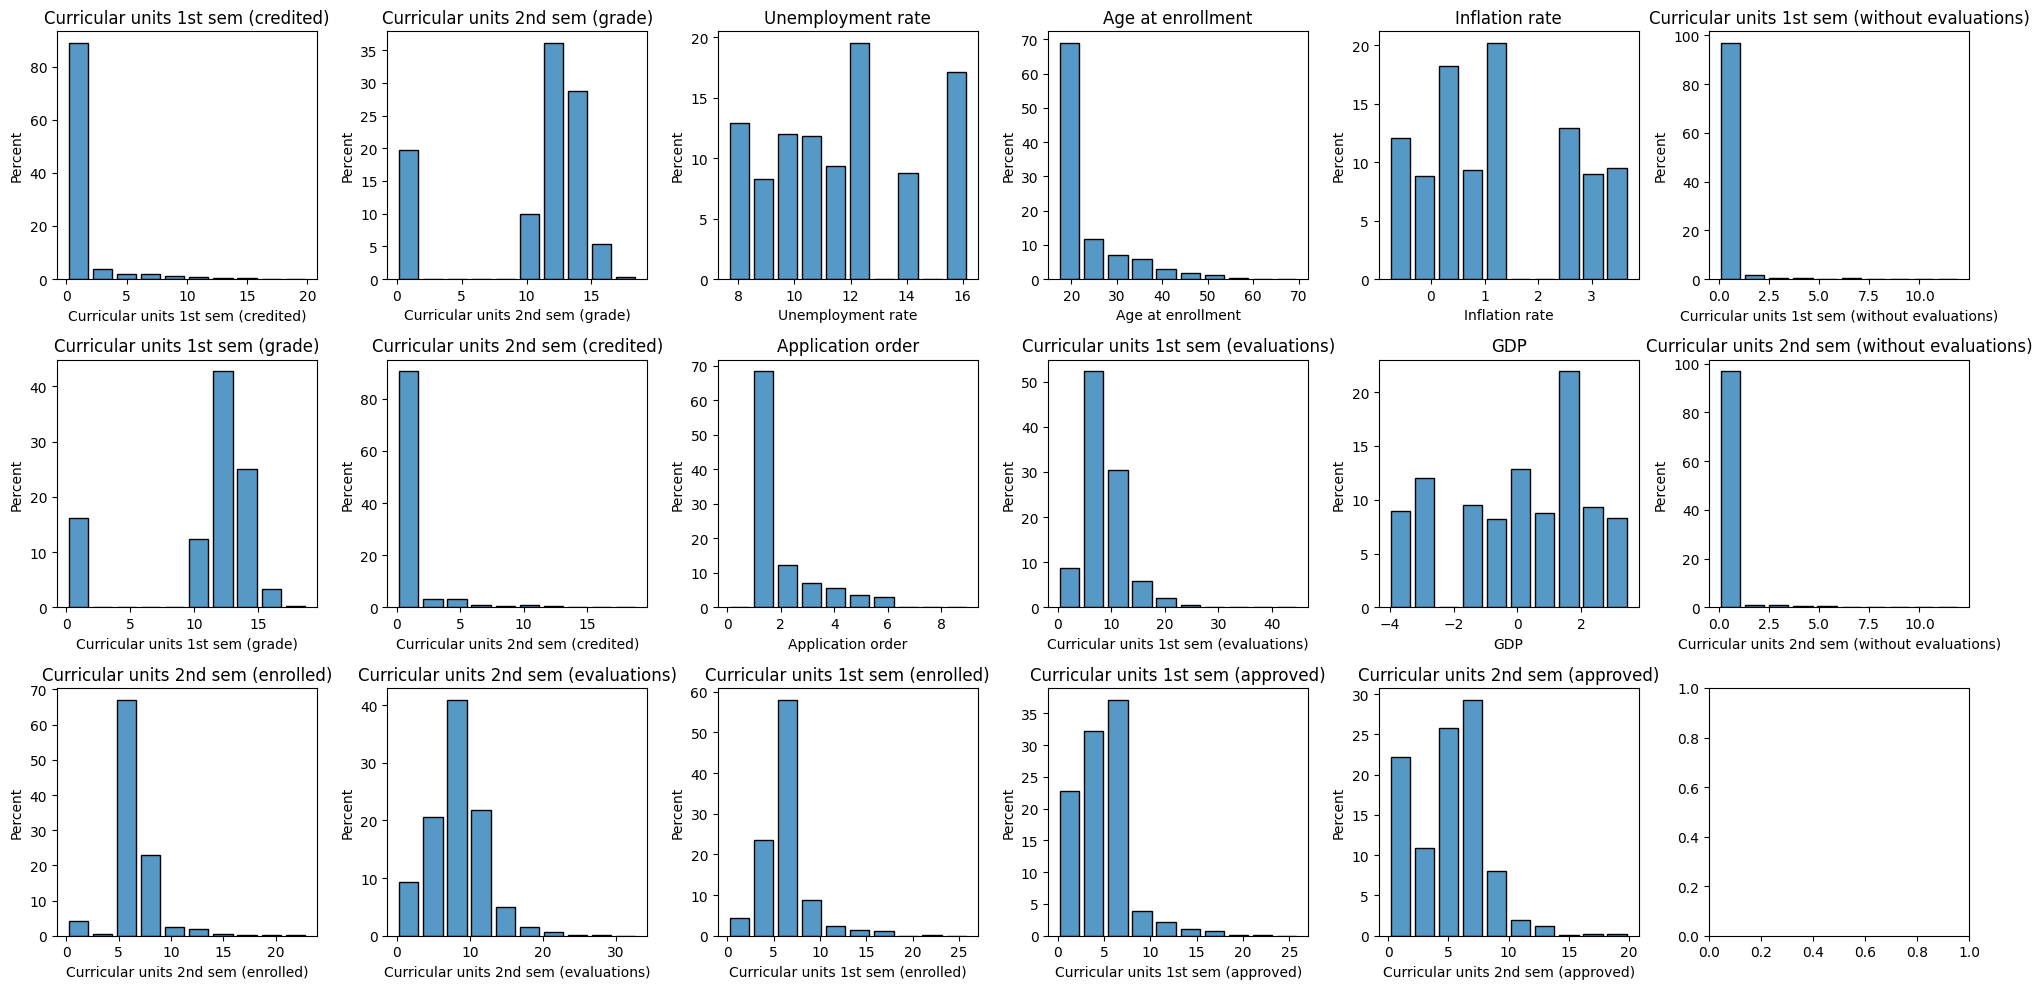

In [ ]:
fig, axes = plt.subplots(3, 6, figsize=(20,10))
for k in range(len(Numeric_features)):
    sns.histplot(ax=axes[k//6][k%6], data=data, x=Numeric_features[k], bins=10, element="bars", shrink=0.8, stat="percent")
    axes[k//6][k%6].set_title(Numeric_features[k])
plt.tight_layout()
plt.show()

Observe the relationship between features and the predicted value

<ipython-input-41-adda683046be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


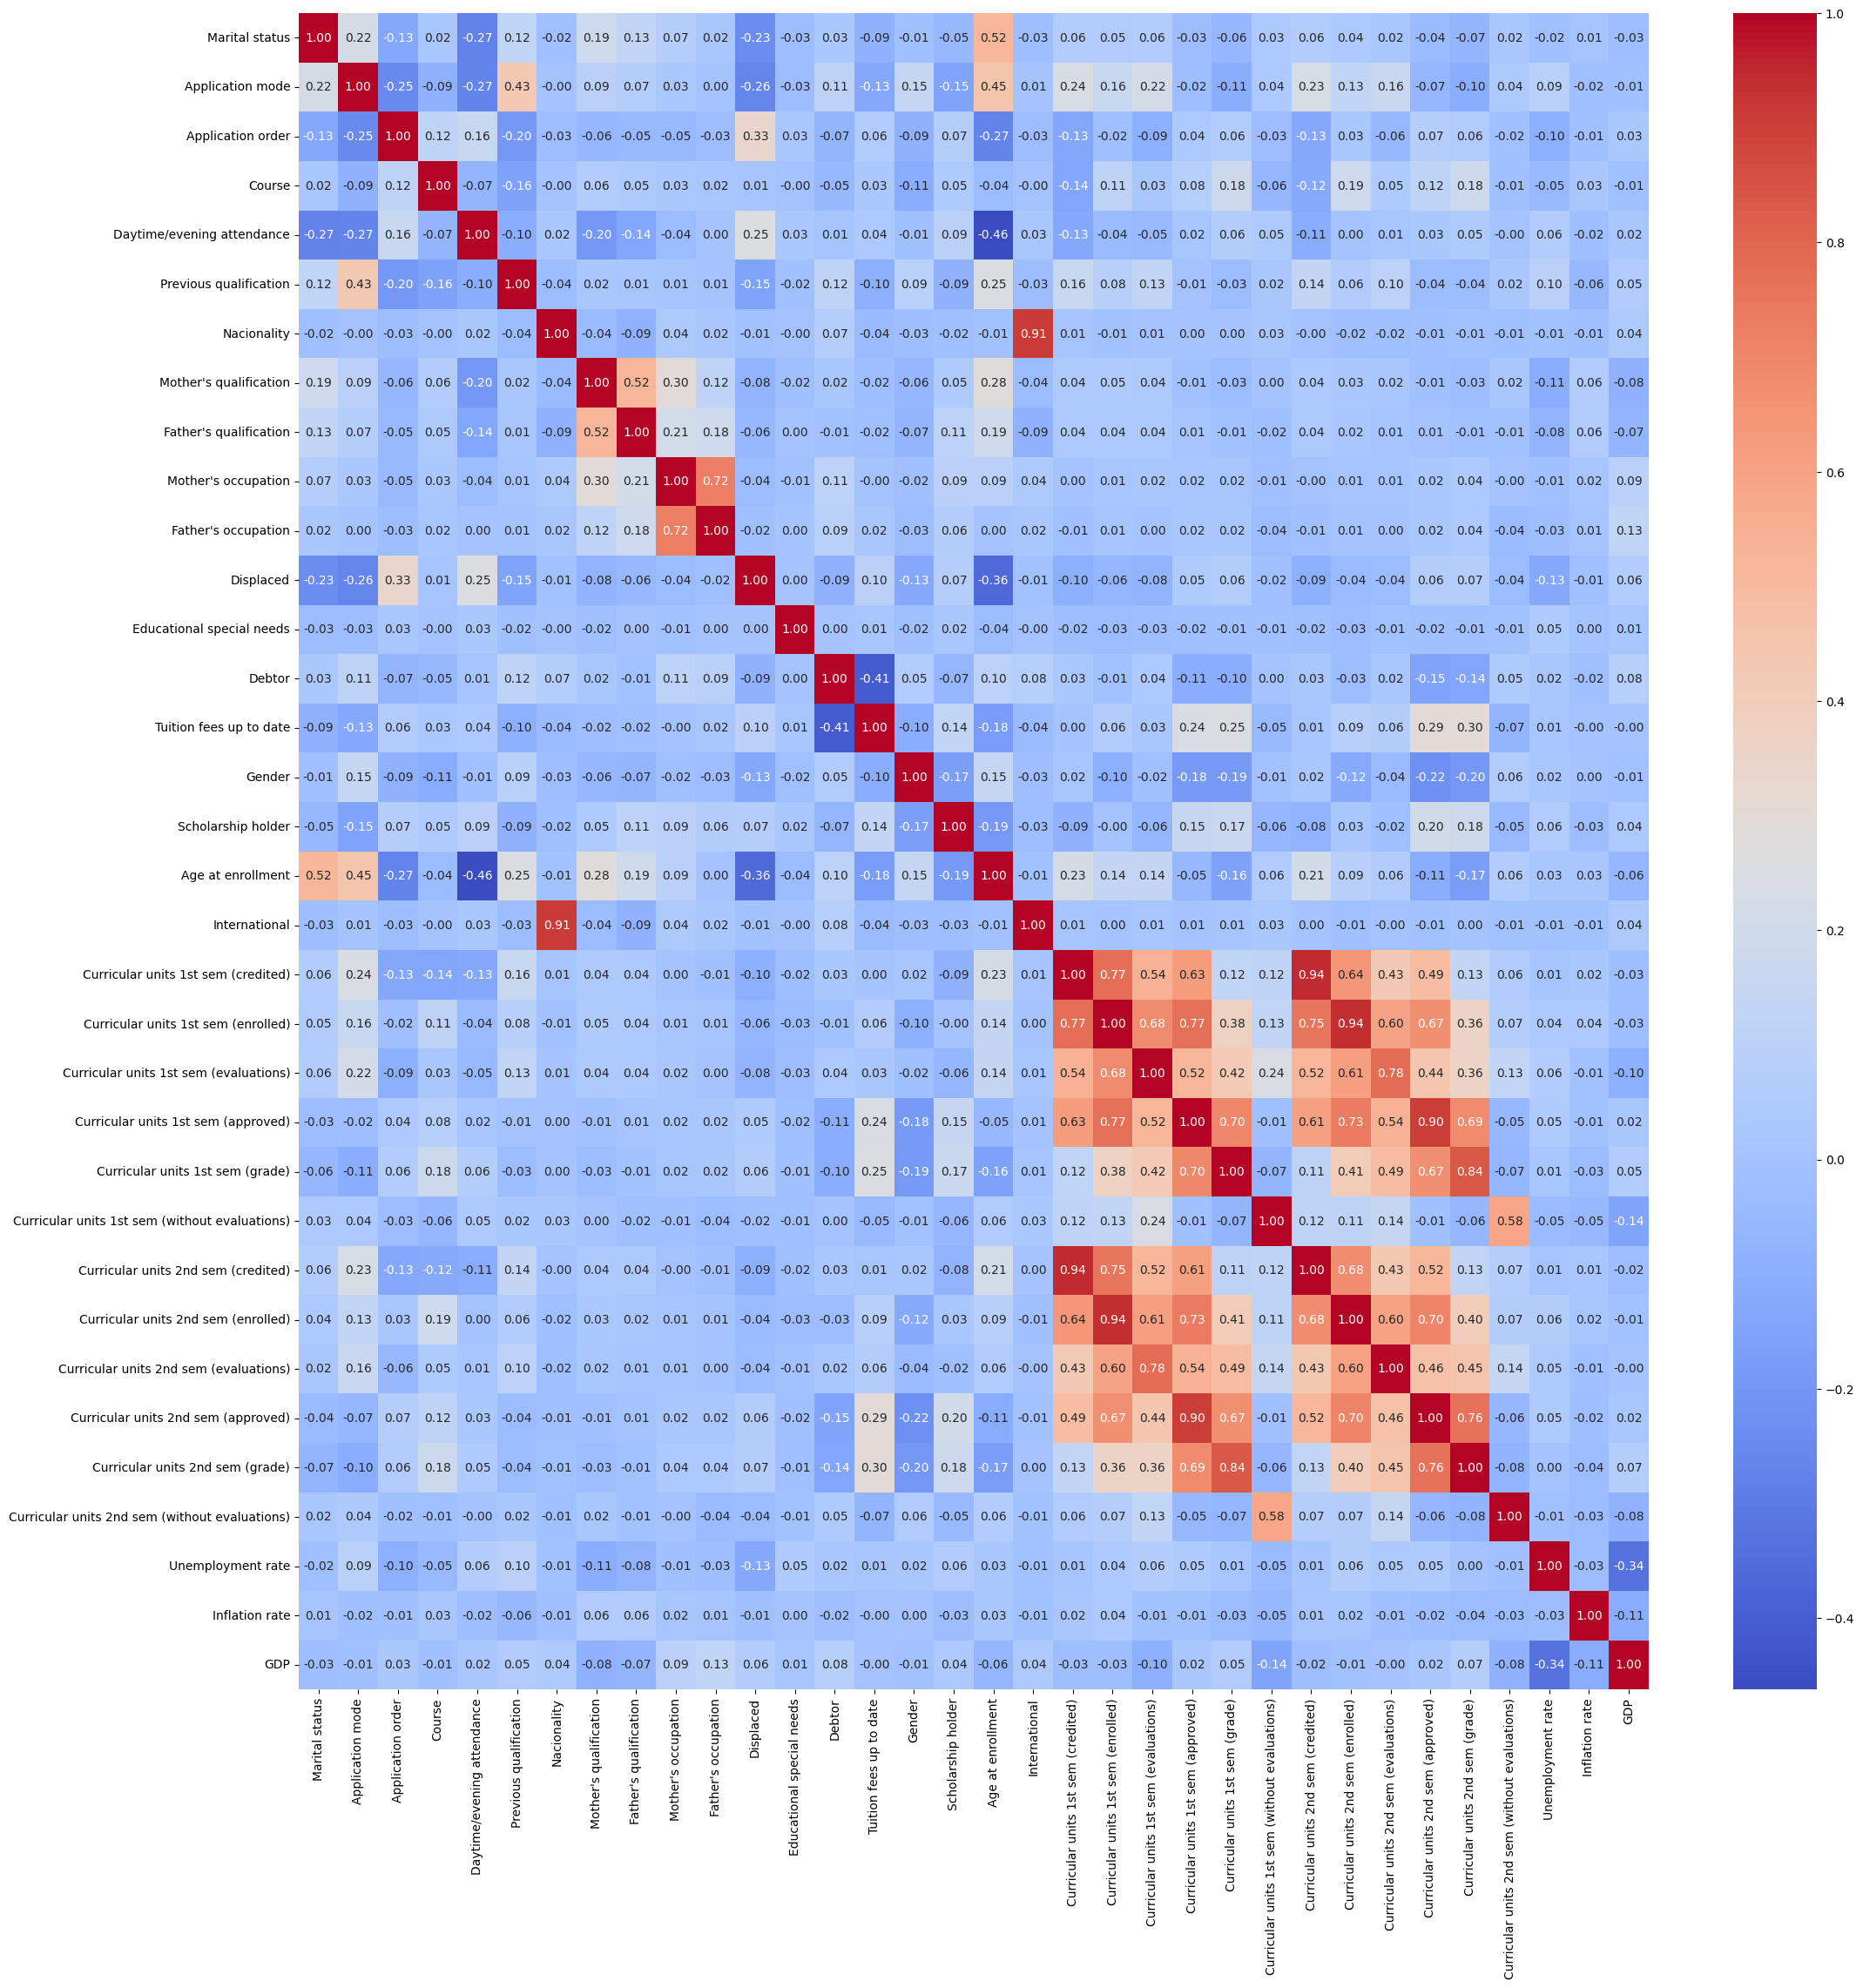

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()
plt.savefig('correlation_matrix.png')


In [ ]:
num = data['Target'].value_counts()
for i in range(len(num.index)):
    data['Target'] = data['Target'].replace(num.index[i], num[num.index[i]])

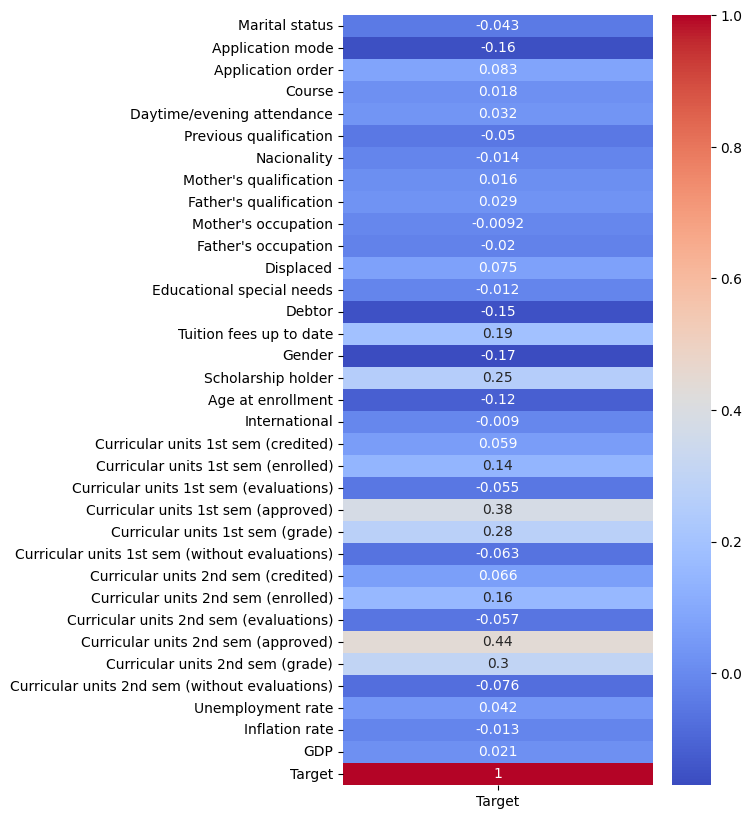

In [ ]:
plt.figure(figsize=(5,10))
sns.heatmap(data.corr()[['Target']], cmap="coolwarm", annot=True)
plt.show()

# DECISION TREE

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [ ]:
X = data.drop(['Nacionality', 'International', 'Target'], axis=1)
y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.29482875,  0.21006857,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       [-0.29482875, -0.16740639, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377,  2.49089589, ..., -0.28763846,
         0.12438647,  0.76576084],
       ...,
       [-0.29482875, -1.11109377, -0.55406775, ...,  0.87622207,
        -1.10522155,  0.34719942],
       [-0.29482875, -1.11109377, -0.55406775, ..., -0.81325289,
        -1.46687097, -1.37551124],
       [-0.29482875, -0.35614386, -0.55406775, ...,  0.42569541,
         1.7879738 , -0.74987207]])

In [ ]:
y.value_counts().to_frame()

,Target
2,2209
1,1421
0,794


In [ ]:

# Importing and cleaning the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
# Modelling
#from sklearn.model_selection import GridSearchCV\ criterion="entropy", max_depth=3

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# # Evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=4)
# scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# # Transform the dataset
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
# # Summarize the new class distribution
# counter = Counter(y_train)
# print(counter)

In [ ]:
# #Evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))

In [ ]:
# Predictions
yhat = clf.predict(X_test)
yhat_prob = clf.predict_proba(X_test)

In [ ]:
# Classificaton report
from sklearn.metrics import classification_report # evaluation metric
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.38      0.42      0.39       151
           1       0.75      0.66      0.70       316
           2       0.77      0.81      0.79       418

    accuracy                           0.69       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.70      0.69      0.69       885



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy: %.3f" % accuracy_score(y_test, yhat))
print('Precision: %.3f' % precision_score(y_test, yhat, average='macro'))
print("Recall: %.3f" % recall_score(y_test, yhat, average='macro'))
print("F1-score: %.3f" % f1_score(y_test, yhat, average='macro'))

Accuracy: 0.690
Precision: 0.633
Recall: 0.630
F1-score: 0.630


In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.6903954802259887


In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
print(cm)

[[ 63  36  52]
 [ 60 208  48]
 [ 45  33 340]]


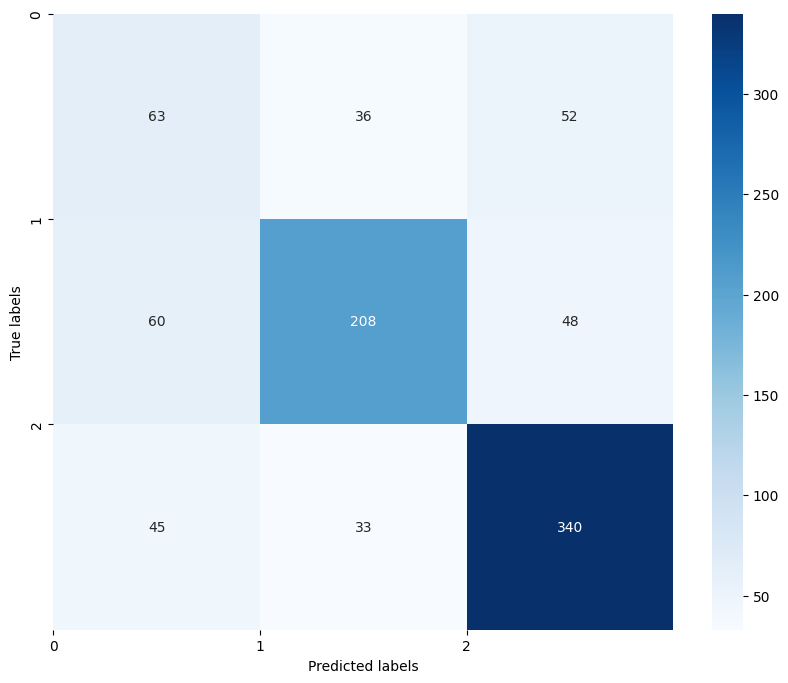

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Lấy danh sách các nhãn từ dữ liệu thực tế
labels = list(set(y_test))

# Tính Confusion Matrix
cm = confusion_matrix(y_test, yhat, labels=labels)

# Biểu diễn Confusion Matrix bằng heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# Đặt tên cho các trục
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Đặt tên cho các nhãn trục x và trục y
x_labels = labels  # Các nhãn của trục x (dự đoán)
y_labels = labels  # Các nhãn của trục y (thực tế)
plt.xticks(np.arange(len(x_labels)), x_labels)
plt.yticks(np.arange(len(y_labels)), y_labels)

# Hiển thị biểu đồ
plt.show()

# TUNE

In [ ]:
# !!!!!!tiến hành TUNE !!!!
from sklearn.model_selection import GridSearchCV
tune_treeclass={"criterion" :['gini','entropy'],
                #"splitter":['best', 'random'],
                "max_depth":[1,5,9],
                "min_samples_split":[2,4,8],
                "min_samples_leaf":[1,2,4,8],
                #"min_weight_fraction_leaf":[0.1,0.2,0.3],
                #"max_features":[],
                #"random_state":[],
                "max_leaf_nodes":[8,16,32],
                "min_impurity_decrease":[0,0.001,0.002],
                #"class_weight":[],
                #"ccp_alpha":[0.1,0.2,0.3],
          }

tune_dtc=GridSearchCV(clf,param_grid=tune_treeclass,scoring='neg_mean_squared_error',cv=2,verbose=3)
tune_dtc.fit(X_train,y_train)

Fitting 2 folds for each of 648 candidates, totalling 1296 fits
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2;, score=-0.609 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=2;, score=-0.641 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=4;, score=-0.609 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=4;, score=-0.641 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=8;, score=-0.609 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_leaf_nodes=8, min_impurity_decrease=0, min_samples_leaf=1, min_samples_split=8;, score=-0.641 t

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 9], 'max_leaf_nodes': [8, 16, 32],
                         'min_impurity_decrease': [0, 0.001, 0.002],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 4, 8]},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
print(tune_dtc.best_params_)
print(tune_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 32, 'min_impurity_decrease': 0, 'min_samples_leaf': 8, 'min_samples_split': 2}
-0.5744592207924935


In [ ]:
tune_dtc.cv_results_

{'mean_fit_time': array([0.00279653, 0.00255513, 0.00307274, 0.0031811 , 0.0030508 ,
        0.00296307, 0.00294554, 0.00306988, 0.00294793, 0.00294626,
        0.00291789, 0.00308442, 0.00294328, 0.00301635, 0.00311387,
        0.00302231, 0.00307858, 0.00300086, 0.00305378, 0.00297892,
        0.00327146, 0.00258601, 0.00301802, 0.00468326, 0.00260818,
        0.00244439, 0.00264323, 0.00304878, 0.00304782, 0.00297749,
        0.00305319, 0.00310409, 0.00262177, 0.00308609, 0.0029372 ,
        0.00310016, 0.00317466, 0.00341868, 0.00368929, 0.00334144,
        0.00297582, 0.0031755 , 0.00297749, 0.00296533, 0.00296891,
        0.00317383, 0.00303471, 0.00574553, 0.0029124 , 0.00300241,
        0.00297976, 0.00302231, 0.00326014, 0.00297201, 0.00306547,
        0.00312412, 0.00299644, 0.00304544, 0.00299108, 0.00319695,
        0.00406206, 0.0034188 , 0.00257146, 0.00254107, 0.00272369,
        0.00296414, 0.0029881 , 0.00303376, 0.00309861, 0.00468755,
        0.00263774, 0.0038656 ,

accuracy : 0.6768361581920904
recall: 0.6165758381963032
precision : 0.6216901721618703
f1_score:  0.6807716251159953
confusion matrix : [[ 62  37  52]
 [ 65 200  51]
 [ 53  28 337]]
TUN
accuracy tuned  : 0.7457627118644068
recall tuned : 0.6425475530862227
precision tuned : 0.7025996272834205
f1_score tuned :  0.7247876303292943
confusion matrix tuned :
[[ 43  32  76]
 [ 30 216  70]
 [  7  10 401]]


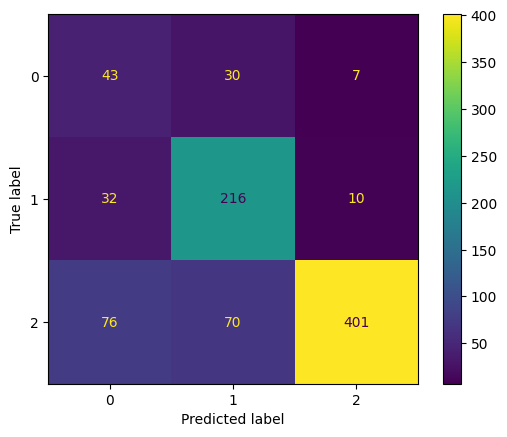

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
my_tree=DecisionTreeClassifier()
my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
notun=[]
print("accuracy :" , accuracy_score(y_test, y_pred))
notun.append(accuracy_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred, average='macro'))
notun.append(recall_score(y_test, y_pred, average='macro'))
print("precision :",precision_score(y_test, y_pred, average='macro'))
notun.append(precision_score(y_test, y_pred, average='macro'))
print("f1_score: ",f1_score(y_test, y_pred, average='weighted'))
notun.append(f1_score(y_test, y_pred, average='weighted'))
print("confusion matrix :" , confusion_matrix(y_test, y_pred))
my_tree=DecisionTreeClassifier(criterion='entropy',max_depth=9 ,max_leaf_nodes=32, min_samples_leaf= 8,
min_samples_split= 4)
#'criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 32, 'min_impurity_decrease': 0, 'min_samples_leaf': 8, 'min_samples_split': 4}
my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
print("TUN")
tun=[]
print("accuracy tuned  :" , accuracy_score(y_test, y_pred))
tun.append( accuracy_score(y_test, y_pred))
print("recall tuned :",recall_score(y_test, y_pred, average='macro'))
tun.append(recall_score(y_test,y_pred, average='macro'))
print("precision tuned :",precision_score(y_test, y_pred, average='macro'))
tun.append(precision_score(y_test,y_pred, average='macro'))
print("f1_score tuned : ",f1_score(y_test, y_pred, average='weighted'))
tun.append(f1_score(y_test,y_pred,average='weighted'))
print("confusion matrix tuned :")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test))
disp = disp.plot()

accuracy : 0.6768361581920904
recall: 0.6142705318001257
precision : 0.6186558969066709
f1_score:  0.6790782904194107
confusion matrix : [[ 60  37  54]
 [ 63 202  51]
 [ 48  33 337]]
TUN
accuracy tuned  : 0.7457627118644068
recall tuned : 0.6425475530862227
precision tuned : 0.7025996272834205
f1_score tuned :  0.7247876303292943
confusion matrix tuned :
[[ 43  32  76]
 [ 30 216  70]
 [  7  10 401]]


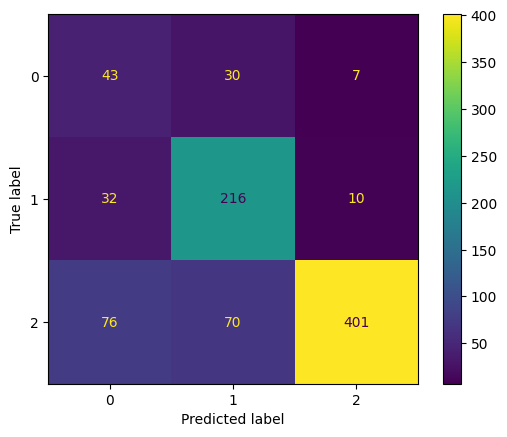

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
my_tree=DecisionTreeClassifier()
my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
notun=[]
print("accuracy :" , accuracy_score(y_test, y_pred))
notun.append(accuracy_score(y_test, y_pred))
print("recall:", recall_score(y_test, y_pred, average='macro'))
notun.append(recall_score(y_test, y_pred, average='macro'))
print("precision :",precision_score(y_test, y_pred, average='macro'))
notun.append(precision_score(y_test, y_pred, average='macro'))
print("f1_score: ",f1_score(y_test, y_pred, average='weighted'))
notun.append(f1_score(y_test, y_pred, average='weighted'))
print("confusion matrix :" , confusion_matrix(y_test, y_pred))
my_tree=DecisionTreeClassifier(criterion='entropy',max_depth=9  ,max_leaf_nodes=32, min_samples_leaf= 8,
min_samples_split= 2)
#'criterion': 'gini', 'max_depth': 9, 'max_leaf_nodes': 32, 'min_impurity_decrease': 0.002, 'min_samples_leaf': 8, 'min_samples_split': 4

#criterion': 'entropy', 'max_depth': 9, 'max_leaf_nodes': 32, 'min_impurity_decrease': 0, 'min_samples_leaf': 8, 'min_samples_split': 2}
my_tree.fit(X_train,y_train)
y_pred=my_tree.predict(X_test)
print("TUN")
tun=[]
print("accuracy tuned  :" , accuracy_score(y_test, y_pred))
tun.append( accuracy_score(y_test, y_pred))
print("recall tuned :",recall_score(y_test, y_pred, average='macro'))
tun.append(recall_score(y_test,y_pred, average='macro'))
print("precision tuned :",precision_score(y_test, y_pred, average='macro'))
tun.append(precision_score(y_test,y_pred, average='macro'))
print("f1_score tuned : ",f1_score(y_test, y_pred, average='weighted'))
tun.append(f1_score(y_test,y_pred,average='weighted'))
print("confusion matrix tuned :")
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix(y_pred, y_test))
disp = disp.plot()

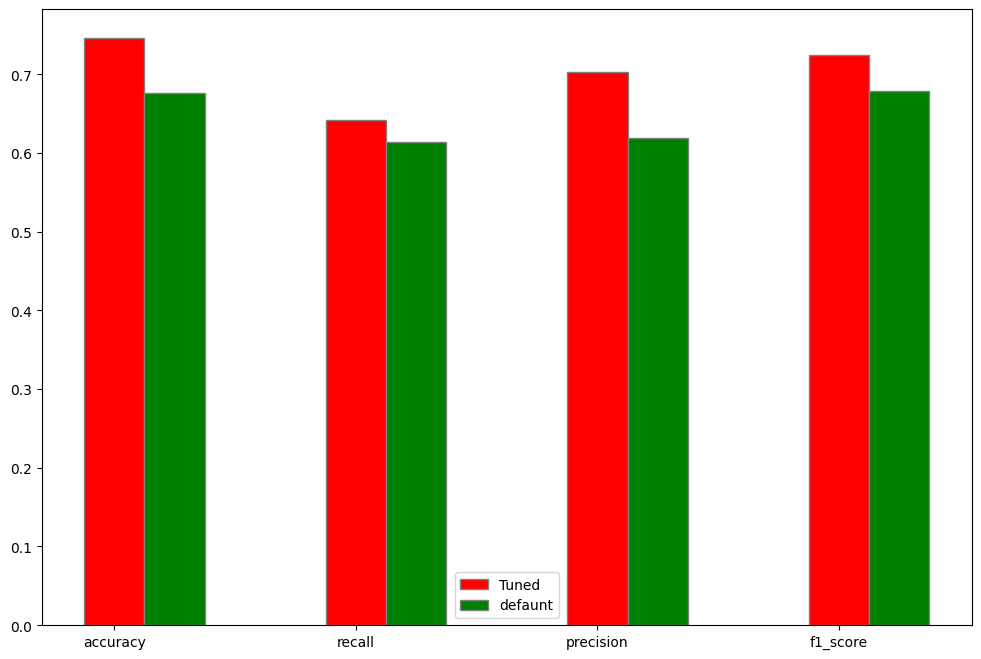

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# Set position of bar on X axis
br1 = np.arange(len(tun))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br2, tun, color ='r', width = barWidth,
        edgecolor ='grey', label ='Tuned')
plt.bar(br3, notun, color ='g', width = barWidth,
        edgecolor ='grey', label ='defaunt')
#plt.bar(br3, CSE, color ='b', width = barWidth,
        #edgecolor ='grey', label ='CSE')

# Adding Xticks
plt.xlabel('', fontweight ='bold', fontsize = 15)
plt.ylabel('', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(tun))],['accuracy', 'recall', 'precision', 'f1_score'])

plt.legend()
plt.show()